<a href="https://colab.research.google.com/github/Alwaline/hexagon_map/blob/main/%D0%93%D0%B0%D0%BD%D0%B8%D0%B5%D0%B2_%D0%90%D0%BD%D0%B4%D1%80%D0%B5%D0%B9_%22%D0%94%D0%97_3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 3

Многие настольные игры используют гексагональные сетки для игры

![Фото гексагональной сетки](https://i2022.otzovik.com/2022/02/07/13040498/img/2052370_34559663.jpeg)

В этом домашнем задании рассмотрим как хранятся гексагоны, как можно генерировать ландшафт и порешаем задачи поиска кратчайшего пути м-ду точками игрового поля

## Как хранить гексагоны (1 балл)

[Тут описана матчасть](https://www.redblobgames.com/grids/hexagons/)

Самые удобные варианты - матрица и куб

Как отрисовать гексагоны посредством матрицы - нетривиальная задача, поэтому ниже рассматривается хранение через куб

У каждой точки в кубе есть 6 смежных точек, как сторон в гексагоне

Представим что каждый гексагон - это некоторая точка в пространстве (в кубе)

<img src="https://drive.google.com/uc?export=view&id=1Nnii4DSWV_tk-r1X-LGHcw0PM_4t2z3X" height="200"/>

Попробуем к нашему гексагону приписать смежные точки

<img src="https://drive.google.com/uc?export=view&id=164DoK1j1ojL9TuAKu4etxbetXGR4_Vj5" height="400"/>

Но заметим что смежные точки не смежны м-ду собой

Например, (0, -1, 0) и (0, 0, -1) - не соседи, хотя в этой модели они стоят рядом

Поэтому такая модель не будет работать

Попробуем другую модель

Введем такие правила:
- Сумма координат равна нулю
- x не изменяется по вертикали
- y и z не изменяются по соответствующим диагоналям

<img src="https://drive.google.com/uc?export=view&id=1sPOFOJXsX9Ppd2QpYXmxv-2Z6kRHw4VR" height="400"/>

Теперь немного поменялось понятие смежности

Смежными считаются клетки, отличающиеся по **двум** координатам и отличающиеся ровно на **два** пункта

Например:
(-1, 1, 0) и (-1, 0, 1)

Отличаются координатами y и z, сумма разниц координат равна двум

Теперь модель работает

Распишем по аналогии для гексагонов длины 2 от центра

<img src="https://drive.google.com/uc?export=view&id=10bhJJ-AD3ltGN6KUYQEo_tKjnqdSrD9D" height="600"/>

Однако использовать отрицательные индексы не стоит, будем использовать только положительные

Для этого нам придется сместить все координаты

Нужно перевести координаты из диапазона [-2; 2] в диапазон [0; 4], значит к каждой координате надо прибавить 2

Для хранения поля с расстоянием 2 от центра, нам нужен куб размера 5 x 5 x 5 (диапазон [0; 4])

Соответственно, куб размера N x N x N, может хранить гексагоны с расстоянием до N // 2 от центра


Для того, чтобы хранить гексагон сам по себе в такой модели, нам нужен куб

Но помимо этого гексагон еще должен хранить какую-то полезную информацию, значит нам нужна как минимум 4-мерная фигура

Работать с таким очень тяжело, поэтому будем хранить некоторый гексагон как массив длины 4 в формате\
[x, y, z, data]

А куб со всеми гексагонами будем хранить как матрицу, каждый элемент которой - гексагон (длины 4)

Для начала сделаем куб 5 x 5 x 5

In [ ]:
import numpy as np
from itertools import product

N = 5

In [ ]:


"""
TODO:
- Сгенерировать матрицу с shape (N**3, 4)
- Сгенерить декартово произведение координат длины 3
- Заполнить 4-ю колонку дефолтными значениями (-1, например)

Результат - data
"""
# Код тут
data = np.array([[i, j, k, -1] for i in range(N) for j in range(N) for k in range(N)])

In [ ]:
data

array([[ 0,  0,  0, -1],
       [ 0,  0,  1, -1],
       [ 0,  0,  2, -1],
       [ 0,  0,  3, -1],
       [ 0,  0,  4, -1],
       [ 0,  1,  0, -1],
       [ 0,  1,  1, -1],
       [ 0,  1,  2, -1],
       [ 0,  1,  3, -1],
       [ 0,  1,  4, -1],
       [ 0,  2,  0, -1],
       [ 0,  2,  1, -1],
       [ 0,  2,  2, -1],
       [ 0,  2,  3, -1],
       [ 0,  2,  4, -1],
       [ 0,  3,  0, -1],
       [ 0,  3,  1, -1],
       [ 0,  3,  2, -1],
       [ 0,  3,  3, -1],
       [ 0,  3,  4, -1],
       [ 0,  4,  0, -1],
       [ 0,  4,  1, -1],
       [ 0,  4,  2, -1],
       [ 0,  4,  3, -1],
       [ 0,  4,  4, -1],
       [ 1,  0,  0, -1],
       [ 1,  0,  1, -1],
       [ 1,  0,  2, -1],
       [ 1,  0,  3, -1],
       [ 1,  0,  4, -1],
       [ 1,  1,  0, -1],
       [ 1,  1,  1, -1],
       [ 1,  1,  2, -1],
       [ 1,  1,  3, -1],
       [ 1,  1,  4, -1],
       [ 1,  2,  0, -1],
       [ 1,  2,  1, -1],
       [ 1,  2,  2, -1],
       [ 1,  2,  3, -1],
       [ 1,  2,  4, -1],


Сделаем функцию изменения массива data по координатам гексагона

Полезной информацией в гексагоне будем считать его расстояние от центра куба

In [ ]:
"""
coords - координаты в формате [x, y, z]
info - растояние гексагона от центра

TODO:
- Посчитать индекс координат в массиве
- По посчитанном индексу записать info
"""
def set_data(coords: list, info: int):
    x, y, z = coords
    data[x * N**2 + N * y + z, -1] = info

Поменяем расстояние для длины 0 и 1



In [ ]:
set_data([2, 2, 2], 0)

set_data([2, 3, 1], 1)
set_data([2, 1, 3], 1)
set_data([1, 2, 3], 1)
set_data([3, 2, 1], 1)
set_data([1, 3, 2], 1)
set_data([3, 1, 2], 1)

Сделаем аналогичную функцию, но центром будем считать гексагон с координатами [0, 0, 0]

In [ ]:
"""
Делаем аналогичную вещь, но смещаем каждую координату
"""

def set_rel_data(coords: list, info: int):
    #Код тут
    x, y, z = coords
    x, y, z = x + N//2, y + N//2, z + N//2
    data[x * N**2 + N * y + z, -1] = info


Поменяем расстояние для гексагонов длины 2

In [ ]:
set_rel_data([0, 2, -2], 2)
set_rel_data([1, 1, -2], 2)
set_rel_data([2, 0, -2], 2)
set_rel_data([2, -1, -1], 2)
set_rel_data([2, -2, 0], 2)
set_rel_data([1, -2, 1], 2)
set_rel_data([0, -2, 2], 2)
set_rel_data([-1, -1, 2], 2)
set_rel_data([-2, 0, 2], 2)
set_rel_data([-2, 1, 1], 2)
set_rel_data([-2, 2, 0], 2)
set_rel_data([-1, 2, -1], 2)

Отрисуем нашу фигуру

In [ ]:
import plotly.express as px
fig = px.scatter_3d(
    data,
    x=data[:, 0],
    y=data[:, 1],
    z=data[:, 2],
    color=data[:, 3]
)
fig.show()

<details>
  <summary>
    Если ячейка не загрузилась, должно быть так
  </summary>

  ![График](https://drive.google.com/uc?export=view&id=1v2MrbIptn1VUcQje7XCCz2-kdf_OpOgU)
</details>

Как видно, в фигуре слишком много "лишних" точек

Отрисуем только гексагоны (где в 4-й колонке не -1)

In [ ]:
data_to_write = data[data[:, 3] != -1]
fig = px.scatter_3d(
    data_to_write,
    x=data_to_write[:, 0],
    y=data_to_write[:, 1],
    z=data_to_write[:, 2],
    color=data_to_write[:, 3]
)
fig.show()

<details>
  <summary>
    Если ячейка не загрузилась, должно быть так
  </summary>
  
  ![График](https://drive.google.com/uc?export=view&id=1BT6oMWwbX2pb5bz2vgV_S55saad6J_MZ)
</details>

Сделаем функцию создания куба, хранящего гексагоны до заданного расстояния

In [ ]:
"""
max_dist - максимальное расстояние гексагона

TODO:
- Вычислить N в зависимости от max_dist
- Собрать код генерации куба выше в одну функцию

Примечание: расстояние от центра не добавлять, займемся этим ниже
"""

def create_map(max_dist: int):
    N = max_dist * 2 + 1

    data = np.array([[i, j, k, 1] for i in range(N) for j in range(N) for k in range(N)])

    return data


In [ ]:
MAX_DIST = 20

map_data = create_map(MAX_DIST)

In [ ]:
map_data

array([[ 0,  0,  0,  1],
       [ 0,  0,  1,  1],
       [ 0,  0,  2,  1],
       ...,
       [40, 40, 38,  1],
       [40, 40, 39,  1],
       [40, 40, 40,  1]])

Благодаря правилу\
"сумма координатов гексагона равна 0", гексагоны лежат в плоскости, которая задается уравнением

$$ x + y + z = 0 $$

И для того, чтобы получить индексы гексагонов, достаточно проверять, удовлетворяет ли точка в кубе этому условию

Однако мы смещали каждую координату на некоторую длину, чтобы не использовать отрицательные индексы\
Значит, нам необходимо проверять условие

$$ (x - c) + (y - c) + (z - c) = 0 $$
$$ x + y + z = 3c $$

Где $c$ - размер смещения (т.е максимальная длина гексагона)

Сделаем функцию получения индексов гексагонов

In [ ]:
"""
coords_map - куб с гексагонами

Функция проходит по точкам куба и проверяет соответствие условию гексагона
Возвращает массив индексов гексагонов

Для реализации лучше использовать np.where
"""

def get_hex_idxs(coords_map):
    # Код тут
    return np.where(coords_map[:, 0] + coords_map[:, 1] + coords_map[:, 2] == MAX_DIST*3)[0]

In [ ]:
hexagon_idxs = get_hex_idxs(map_data)

hexagon_idxs

array([  860,   900,   940, ..., 67980, 68020, 68060])

Для каждого гексагона определим и запишем его расстояние до центра

Рекомендую еще раз взглянуть на рисунок и самостоятельно найти закономерность, по которой можно определять расстояние до центра

<img src="https://drive.google.com/uc?export=view&id=10bhJJ-AD3ltGN6KUYQEo_tKjnqdSrD9D" height="600"/>

In [ ]:
hexagon_data = map_data[hexagon_idxs]
for hexagon in hexagon_data:
    # Код здесь
    hexagon[-1] = max(abs(hexagon[:-1] - MAX_DIST))

Нарисуем гексагоны с учетом расстояния до центра

In [ ]:
fig = px.scatter_3d(
    hexagon_data,
    x=hexagon_data[:, 0],
    y=hexagon_data[:, 1],
    z=hexagon_data[:, 2],
    color=hexagon_data[:, 3]
)
fig.show()

<details>
  <summary>
    Если ячейка не загрузилась, должно быть так
  </summary>

  ![График](https://drive.google.com/uc?export=view&id=1tGj0jFt2EqfLOsqP7xFYnFDkeLHWECa1)
</details>

## Генерация игрового поля (1 балл)

До этого мы хранили в гексагоне его расстояние до центра

Теперь в гексагоне будем хранить тип клетки на поле (луг/река/гора и т.д.)

Для начала сделаем пустое поле

In [ ]:
new_map = create_map(MAX_DIST)
hex_idxs = get_hex_idxs(new_map)
hex_data = new_map[hex_idxs]

In [ ]:
fig = px.scatter_3d(
    hex_data,
    x=hex_data[:, 0],
    y=hex_data[:, 1],
    z=hex_data[:, 2],
    color=hex_data[:, 3]
)
fig.show()

<details>
  <summary>
    Если ячейка не загрузилась, должно быть так
  </summary>

  ![График](https://drive.google.com/uc?export=view&id=11RfLICjhr5aUbHWFZbMp4X1LeG9IxYWL)
</details>

Для начала выпишем все возможные "движения" по гексогональной сетке

In [ ]:
ALL_MOVEMENTS = np.array([
    [0, 1, -1],
    [1, 0, -1],
    [1, -1, 0],
    [0, -1, 1],
    [-1, 0, 1],
    [-1, 1, 0]
])

### Генерация рек

Для генерации рек:
- выберем 3 движения в одном направлении
- зададим число рек для генерации
- укажем тип клетки реки (10)
- Для каждой реки:
  - генерируем случайную длину реки (до 10 клеток)
  - выбираем случайную стартовую точку реки
  - до тех пор пока длина реки меньше выбранной
    - выбираем случайное движение из 3
    - передвигаемся к новой клетке (если клетка - поле)
    - меняем тип новой клетки на реку

In [ ]:
import random

river_movements = ALL_MOVEMENTS[0:2]

RIVERS_COUNT = 10

MAX_RIVER_LENGTH = 7

RIVER_TYPE = 10

np.random.seed(42)
random.seed(42)

river_map = np.copy(new_map)

In [ ]:
# Код здесь
def get_idx(coords: list):
    N = MAX_DIST * 2 + 1
    x, y, z = coords
    return x * N**2 + N * y + z

def set_data(coords: list, info: int, map):
    idx = get_idx(coords)
    if idx in hexagon_idxs:
        map[idx, -1] = info

for _ in range(RIVERS_COUNT):
    river_len = random.randint(1, MAX_RIVER_LENGTH)
    random_idx = random.choice(hexagon_idxs)

    x, y, z, d = river_map[random_idx]

    len_now = 0
    while len_now < river_len:

        set_data([x, y, z], RIVER_TYPE, river_map)

        random_move = random.choice(river_movements)

        m_x, m_y, m_z = random_move
        x, y, z =  m_x + x, m_y + y, m_z + z # двигаем крышу реки

        if get_idx([x, y, z]) not in hexagon_idxs: # мы дошли до края мира, галлы в ужасе
            break

        len_now += 1





Отрисуем получившееся поле

In [ ]:
hex_data = river_map[hex_idxs]

fig = px.scatter_3d(
    hex_data,
    x=hex_data[:, 0],
    y=hex_data[:, 1],
    z=hex_data[:, 2],
    color=hex_data[:, 3]
)
fig.show()

<details>
  <summary>
    Если ячейка не загрузилась, должно быть так
  </summary>

  ![График](https://drive.google.com/uc?export=view&id=1RDB5zt5YDP2RUj0G-Z6a9kweqKehBYed)
</details>

### Генерация гор

Для генерации гор:
- зададим число гор для генерации
- укажем тип клетки горы (100)
- Для каждой горы:
  - генерируем случайную длину реки (до 10 клеток)
  - выбираем случайную точку карты
  - пробегаемся по всем движениям, для каждой клетки указываем тип поля - гора

In [ ]:
hills_map = np.copy(river_map)

HILLS_COUNT = 10

HILLS_TYPE = 100

In [ ]:
# Код здесь
for _ in range(HILLS_COUNT):
    hill_len = random.randint(1, 10)
    random_idx = random.choice(hexagon_idxs)

    x, y, z, d = hills_map[random_idx]

    len_now = 0
    while len_now < hill_len:

        set_data([x, y, z], HILLS_TYPE, hills_map)

        random_move = random.choice(ALL_MOVEMENTS)

        m_x, m_y, m_z = random_move
        x, y, z =  m_x + x, m_y + y, m_z + z # двигаем координаты

        if get_idx([x, y, z]) not in hexagon_idxs: # вы дошли до края мира, дальше живут драконы
            break

        len_now += 1

Покрасим клетки нашего поля в зависимости от типа клетки

In [ ]:
PLAIN_TYPE = 1

types_map = {
    PLAIN_TYPE: "Plain",
    HILLS_TYPE: "Hill",
    RIVER_TYPE: "River",

}

vfunc = np.vectorize(types_map.get)

In [ ]:
hex_data = hills_map[hex_idxs]

colors = vfunc(hex_data[:, 3])

fig = px.scatter_3d(
    hex_data,
    x=hex_data[:, 0],
    y=hex_data[:, 1],
    z=hex_data[:, 2],
    hover_name=hex_idxs,
    color=colors,
    color_discrete_sequence=["#387C44", "gray", "#3EA99F"], # тут поменял местами горы и реки, почему-то было перепутано
)
fig.show()

<details>
  <summary>
    Если ячейка не загрузилась, должно быть так
  </summary>

  ![График](https://drive.google.com/uc?export=view&id=1Ccngh0NwwXGxqm9yUMwLVW82jlvnddgl)
</details>

## Алгоритмы поиска пути

### Подготовка

Покрасим клетки поля в тип поля "путь", чтобы увидеть какой путь был найден

Cоберем функцию для визуализации карты с путем

In [ ]:
ROUTE_TYPE = 1000
PLAIN_TYPE = 1
HILLS_TYPE = 100
RIVER_TYPE = 10


def visualize_solve(route_path):



    route_map = np.copy(hills_map)

    for cell_idx in route_path:
        route_map[cell_idx][-1] = ROUTE_TYPE

    hex_data = route_map[hex_idxs]

    PLAIN_TYPE = 1

    types_map = {
        PLAIN_TYPE: "Plain",
        HILLS_TYPE: "Hill",
        RIVER_TYPE: "River",
        ROUTE_TYPE: "Route"
    }

    vfunc = np.vectorize(types_map.get)

    colors = vfunc(hex_data[:, 3])

    fig = px.scatter_3d(
        hex_data,
        x=hex_data[:, 0],
        y=hex_data[:, 1],
        z=hex_data[:, 2],
        hover_name=hex_idxs,
        color=colors,
        color_discrete_sequence=["#387C44", "gray", "#3EA99F", "maroon"],
    )
    fig.show()

In [ ]:
visualize_solve([59_460, 57_780, 57_740, 56_060, 54_380])

<details>
  <summary>
    Если ячейка не загрузилась, должно быть так
  </summary>

  ![График](https://drive.google.com/uc?export=view&id=1qPivDUWiO7h66_apjgMJFkNRTDUQ9H9M)
</details>

### Бэктрекинг (1 балл)

Начнем с переборного алгоритма

Возьмем 2 точки карты и напишем решение бэктрекингом

In [ ]:
back_from_idx = 52_940
back_to_idx = 45_860

Чтобы решение бэктрекингом не переполняло стек вызовов, введем 2 условности:

- Если расстояние м-ду текущей точкой и точкой назначения больше изначального расстояния (расстояния м-ду стартовой и конечной точкой) более чем в 2 раза - режем ветку решения

- Если расстояние от текущей больше чем от предыдущей точки - режем ветку решения

Сделаем функцию подсчета декартового расстояния

In [ ]:
import math

def count_dist(a_idx, b_idx):
    a_data = hills_map[a_idx][:3]
    b_data = hills_map[b_idx][:3]

    return math.sqrt(sum((a_data - b_data)**2))

In [ ]:
count_dist(back_from_idx, back_to_idx)

16.30950643030009

Напишем бэктрекинговое решение с учетом наших двух условностей

In [ ]:


def is_not_hills_or_river(cell):
    return cell[-1] not in [HILLS_TYPE, RIVER_TYPE]

"""
curr_idx - текущий индекс клетки
path - массив, путь до текущей клетки
prev_dist - расстояние от предыдущей клетки до итоговой
prev_movement_idx - индекс прошлого движения, используем чтобы не ходить "туда-сюда"
"""
def backtracking(curr_idx, path, prev_dist, prev_movement_idx):
    # Код здесь

    if prev_dist == 0:
        return path

    for move in ALL_MOVEMENTS:
        x, y, z, d = hills_map[curr_idx]

        m_x, m_y, m_z = move

        n_x, n_y, n_z = m_x + x, m_y + y, m_z + z

        n_idx = get_idx([n_x, n_y, n_z])

        if n_idx in hexagon_idxs and \
            n_idx != prev_movement_idx and \
            is_not_hills_or_river(hills_map[n_idx]) and \
            count_dist(n_idx, back_to_idx) <= prev_dist:

            path = path + [n_idx]

            return backtracking(n_idx, path, count_dist(n_idx, back_to_idx), curr_idx)


    return path




In [ ]:
init_dist = count_dist(back_from_idx, back_to_idx)
back_path = backtracking(back_from_idx, [back_from_idx], init_dist, -1)

back_path

[52940,
 52900,
 54540,
 54500,
 56140,
 56100,
 56060,
 56020,
 55980,
 55940,
 55900,
 55860,
 55820,
 54140,
 54180,
 52500,
 50820,
 50860,
 49180,
 47500,
 47540,
 45860]

In [ ]:
visualize_solve(back_path) # Это точно стэком решается, а не очередью?

<details>
  <summary>
    Если ячейка не загрузилась, должно быть так
  </summary>

  ![График](https://drive.google.com/uc?export=view&id=1bI_7zfWiRvJOf8__hiPL1d2SORnhDCKB)
</details>

Однако такое решение все еще может выйти за стек вызовов и не учитывает ландшафт

Соберем функцию визуализации

In [ ]:
def visualise_backtrack_solve(idx_from, idx_to):
    init_dist = count_dist(idx_from, idx_to)

    back_path = backtracking(idx_from, [idx_from], init_dist, -1)

    if back_path is not None:
        visualize_solve(back_path)

P.S ячейка должна упасть из-за выхода за стек вызовов

In [ ]:

back_from_idx = 900
back_to_idx = 67260
visualise_backtrack_solve(back_from_idx, back_to_idx) # нет, ячейка не упала
# И я не пойму, почему цвета сбиваются :(
# Тут серый цвет - это путь

### Жадный алгоритм (1 балл)

Раз бэктрекингом решить не получилось, попробуем сформулировать жадное решение

На самом деле, мы уже начали это делать в бэктрекинге (ввели ограничение на уменьшение расстояния)

Попробуем для начала такое решение:

На каждом шаге будем выбирать такое решение, которое уменьшает расстояние м-ду текущей и конечной точками

In [ ]:
greedy_path = [back_from_idx]
curr_idx = back_from_idx
init_dist = count_dist(back_from_idx, back_to_idx)

curr_dist = init_dist
curr_data = hills_map[curr_idx]
coords = np.array(curr_data[:3])

while curr_dist > 0:
    # Код тут
    for move in ALL_MOVEMENTS:
        n_coords = coords + move

        n_idx = get_idx(n_coords)

        if n_idx in hexagon_idxs and hills_map[n_idx][-1] not in [RIVER_TYPE, HILLS_TYPE] and count_dist(n_idx, back_to_idx) <= curr_dist:
            curr_dist = count_dist(n_idx, back_to_idx)
            curr_idx = n_idx
            n_data = hills_map[curr_idx]
            coords = np.array(n_data[:3])
            break
    greedy_path.append(curr_idx)





In [ ]:
greedy_path

[900,
 2580,
 4260,
 5940,
 7620,
 9300,
 10980,
 12660,
 14340,
 16020,
 17700,
 19380,
 21060,
 22700,
 24380,
 26060,
 27740,
 29420,
 31100,
 32780,
 34460,
 36140,
 37820,
 39500,
 39460,
 41100,
 42780,
 44460,
 46140,
 47820,
 49500,
 51180,
 52860,
 54500,
 56140,
 57780,
 59420,
 61060,
 62700,
 64340,
 65980,
 67620,
 67580,
 67540,
 67500,
 67460,
 67420,
 67380,
 67340,
 67300,
 67260]

In [ ]:
visualize_solve(greedy_path)

<details>
  <summary>
    Если ячейка не загрузилась, должно быть так
  </summary>

  ![График](https://drive.google.com/uc?export=view&id=1bI_7zfWiRvJOf8__hiPL1d2SORnhDCKB)
</details>

Соберем решение в одну функцию

In [ ]:
def count_greedy_path(idx_from, idx_to):
  # Код тут
    greedy_path = [idx_from]
    curr_idx = idx_from
    init_dist = count_dist(idx_from, idx_to)

    curr_dist = init_dist
    curr_data = hills_map[curr_idx]
    coords = np.array(curr_data[:3])

    while curr_dist > 0:
        # Код тут
        for move in ALL_MOVEMENTS:
            n_coords = coords + move

            n_idx = get_idx(n_coords)

            if n_idx in hexagon_idxs and hills_map[n_idx][-1] not in [RIVER_TYPE, HILLS_TYPE] and count_dist(n_idx, idx_to) < curr_dist:
                curr_dist = count_dist(n_idx, idx_to)
                curr_idx = n_idx
                n_data = hills_map[curr_idx]
                coords = np.array(n_data[:3])
                break # если убрать, то пути будут короче, но может застрять в препятствиях
        greedy_path.append(curr_idx)
    return greedy_path

Сделаем функцию визуализации

In [ ]:
def visualise_greedy_solve(idx_from, idx_to):
  greedy_path = count_greedy_path(idx_from, idx_to)

  visualize_solve(greedy_path)

In [ ]:
visualise_greedy_solve(29_540, 46_220)

<details>
  <summary>
    Если ячейка не загрузилась, должно быть так
  </summary>

  ![График](https://drive.google.com/uc?export=view&id=1HdTa3JMVQgpKA21lzC-9AMFvokW21qbt)
</details>

Однако мы все еще не учитываем ландшафт

Модифицируем задачу:
- На каждом шаге получаем все возможные решения
- Выбрасываем решения, которые идут через реки и горы
- Выбрасываем решения, которые идут через уже посещенные точки (убираем циклы)
- Из оставшихся решений выбираем решение с наименьшим расстоянием


In [ ]:
def count_greedy_path(idx_from, idx_to):
    # Код тут
    greedy_path = [idx_from]
    curr_idx = idx_from
    init_dist = count_dist(idx_from, idx_to)

    curr_dist = init_dist
    curr_data = hills_map[curr_idx]
    coords = np.array(curr_data[:3])

    while curr_dist > 0:

        moves_dist = {}
        for move in ALL_MOVEMENTS:
            n_coords = coords + move

            n_idx = get_idx(n_coords)

            if n_idx in hexagon_idxs and hills_map[n_idx][-1] not in [RIVER_TYPE, HILLS_TYPE] and n_idx not in greedy_path:

                new_dist = count_dist(n_idx, idx_to)
                moves_dist[new_dist] = n_idx

        if moves_dist:
            min_dist = min(moves_dist)
            n_idx = moves_dist[min_dist]
            curr_dist = count_dist(n_idx, idx_to)
            curr_idx = n_idx
            n_data = hills_map[curr_idx]
            coords = np.array(n_data[:3])

            greedy_path.append(curr_idx)
        else: # застрял
            return greedy_path


    return greedy_path

In [ ]:
visualise_greedy_solve(29_540, 46_220)

<details>
  <summary>
    Если ячейка не загрузилась, должно быть так
  </summary>

  ![График](https://drive.google.com/uc?export=view&id=1uOr-9bYE0Q_CnuLWGoXnY0X7fIQ-l9iX)
</details>

In [ ]:
visualise_greedy_solve(29_380, 58_060)

In [ ]:
visualise_greedy_solve(900, 67260) # тут прям вообще неудачная генерация для этого алгоритма :(
'''Он считает эту точку самой лучшей, но попадает в ловушку'''

'Он считает эту точку самой лучшей, но попадает в ловушку'

<details>
  <summary>
    Если ячейка не загрузилась, должно быть так
  </summary>

  ![График](https://drive.google.com/uc?export=view&id=1xNQJLnco2r6N6l0pTl3KZb1CWdqJMnpC)
</details>

Это решает задачу куда лучше, чем брутфорс и бэктрекинг, но не гарантирует оптимальное решение

### Динамическое программирование (1 балл)

Возьмем некоторый участок карты и попробуем найти путь м-ду точками при помощи дин. программирования

In [ ]:
part_idxs = hex_idxs[hex_idxs > 51_000]

part_hex_data = hills_map[part_idxs]

colors = vfunc(part_hex_data[:, 3])

fig = px.scatter_3d(
    hex_data,
    x=part_hex_data[:, 0],
    y=part_hex_data[:, 1],
    z=part_hex_data[:, 2],
    hover_name=part_idxs,
    color=colors,
    color_discrete_sequence=["#387C44", "#3EA99F", "gray"],
)
fig.show()

<details>
  <summary>
    Если ячейка не загрузилась, должно быть так
  </summary>

  ![График](https://drive.google.com/uc?export=view&id=1yvtF-10oaWns4zoeqTGn4jjrB_LLqozt)
</details>

Попробуем найти путь м-ду левой верхней точкой и точкой справа снизу, как решали задачку "черепашки"

Зададим индексы искомых точек

In [ ]:
from_idx = 52_140
to_idx = 64_620

In [ ]:
visualize_solve([from_idx, to_idx])

<details>
  <summary>
    Если ячейка не загрузилась, должно быть так
  </summary>

  ![График](https://drive.google.com/uc?export=view&id=1s1ySJ0cebLaKeO0ALr8LtV7HffTAlO31)
</details>

Зададим движения по карте для этих двух точек

In [ ]:
possible_movements = np.array([
    [1, 0, -1],
    [0, 1, -1],
])

Теперь зададим размер матрицы (посчитаем какое максимальное кол-во движений нужно сделать чтобы дойти от одного края матрицы до другого)

In [ ]:
part_n = 8
part_m = 19

Сделаем матрицу весов передвижений

In [ ]:
weights = np.full((part_n, part_m), PLAIN_TYPE)

weights

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

Решим задачку "черепашки"

P.S. Чтобы получить ячейку (i, j) нужно сделать i первых движений и j вторых движений

In [ ]:
# Код тут

for i in range(part_n):
    for j in range(part_m):

        cell = hills_map[from_idx]
        coords = cell[:3]

        now_cell = coords + possible_movements[0] * i + possible_movements[1] * j
        now_idx = get_idx(now_cell[:3])

        if now_idx in hex_idxs and is_not_hills_or_river(hills_map[now_idx]):
            dist = round(count_dist(now_idx, to_idx)) # округляю, сначала хотел умножать на 10^5, но передумал
            if i == 0 and j > 0:
                weights[i, j] = dist + weights[i, j-1]
            elif j == 0 and i > 0:
                weights[i, j] = dist + weights[i-1, j]
            else:
                min_parent = min(weights[i, j-1], weights[i-1, j]) if i > 0 and j > 0 else 0
                weights[i, j] = dist + min_parent
        else: weights[i, j] = 9999


In [ ]:
weights

array([[   32,    62,    91,   119,   145,   170,   194,   216,   237,
          257,   275,   292,   308,   323,   337,   350,   362,   373,
          383],
       [   63,    91,   119,   145,   170,   194,   216,   237,   257,
          275,   292,   308,   323,   336,   348,   359,   369,   378,
          386],
       [   93,   119,   146,   170,   194,   217,   237,   257,   276,
          292,   308,   323,   336,   348,   359,   369,   378,  9999,
         9999],
       [  122,   146,   172,   195,   217,   239,   257,   276,   294,
          308,   323,   337,   348,   359,   369,   378,   385,  9999,
        10005],
       [  150,   172,   197,   219,   239,   260,   276,   294,   311,
          323,   337,   350,   359,   369,   378,   385,  9999, 10004,
        10008],
       [  177,   198,   221,   242,   260,   280,   295,   311,   327,
          337,   350,   362,   369,   378,   385,  9999, 10004, 10008,
        10011],
       [  203,   223,   244,   264,   281,   299,   

Найдем путь от начальной ячейки к конечной

In [ ]:
# Код тут
path = [from_idx]
i = j = 0
while i < (part_n - 1) or j < (part_m - 1):

    cell = hills_map[path[-1]]
    coords = cell[:3]

    if i < (part_n - 1) and j < (part_m - 1):
        if weights[i+1, j] > weights[i, j+1]: # тут если поставить условие >=, то будет идти через горы, я не знаю, как это пофиксить
            n_coords = coords + possible_movements[1]
            j += 1
        else:
            n_coords = coords + possible_movements[0]
            i += 1
    elif i < (part_n - 1):
        n_coords = coords + possible_movements[0]
        i += 1
    elif j < (part_m - 1):
        n_coords = coords + possible_movements[1]
        j += 1

    path += [get_idx(n_coords)]



In [ ]:
path

[52140,
 52180,
 53860,
 55540,
 57220,
 58900,
 58940,
 58980,
 59020,
 60700,
 60740,
 60780,
 60820,
 62500,
 62540,
 62580,
 62620,
 64300,
 64340,
 64380,
 64420,
 64460,
 64500,
 64540,
 64580,
 64620]

In [ ]:
visualize_solve(path)

<details>
  <summary>
    Если ячейка не загрузилась, должно быть так
  </summary>

  ![График](https://drive.google.com/uc?export=view&id=1s_BSGk1yj7ZGX78AVfndzYyxSP0NBbdm)
</details>

### Обобщение задачки черепашки (1 балл)

Попробуем обобщить наш подход:
- Нужно научиться подбирать движения для двух точек
- Нужно научиться определять размерность задачи

Начнем с подбора движений

Для того, чтобы их подобрать, необходимо знать каким образом изменяются координаты м-ду стартовой и финишной точками

In [ ]:
hills_map[from_idx] - hills_map[to_idx] # выше я поменял координаты местами, потому что движения у нас такие тут по идее дожно быть [+, +, -, 0]

array([ -7, -18,  25,   0])

В задаче выше при движении от финала к старту
- x увеличивается
- y увеличивается
- z уменьшается

Для задачи выше будем брать те движения, где z уменьшается

В общем случае будем брать движения с фиксированной непопулярной динамикой для переменной

Например:
- $x\uparrow, y\uparrow, z\downarrow \Rightarrow$ Непопулярная динамика - вниз $\Rightarrow$ Берем движения где $z\downarrow$, "фиксируем" z
- $x\downarrow, y\uparrow, z\downarrow \Rightarrow$ Непопулярная динамика - вверх $\Rightarrow$ Берем движения где $y\uparrow$, "фиксируем" y

А как посчитать размерность?

Для каждого выбранного движения посчитаем разницу в изменяемых переменных

Посчитаем ручками на новом примере

In [ ]:
new_from_idx = 42_140
new_to_idx = 64_300

In [ ]:
def get_diff(idx_from, idx_to):
  return hills_map[idx_from][:3] - hills_map[idx_to][:3]

In [ ]:
get_diff(new_from_idx, new_to_idx)

array([-13,  -8,  21])

Берем движения где $z\uparrow$

In [ ]:
movement_idxs = np.where(ALL_MOVEMENTS[:, 2] == 1)[0]

movements = ALL_MOVEMENTS[movement_idxs]

movements

array([[ 0, -1,  1],
       [-1,  0,  1]])

Выбросим $z$ из движений (т.к $z$ "зафиксирован")

In [ ]:
movements[:, 0:2]

array([[ 0, -1],
       [-1,  0]])

Видим, что в первом движении изменяется $y$, а diff по $y$ = -8 $\Rightarrow$ Можно сделать 9 первых движений ((-8 / -1) + 1)

Аналогично, можно сделать 14 вторых движений

Значит размерность задачи (9, 14)

Теперь закодим эту историю

Начнем с функции получения возможных движений

In [ ]:
"""
Функция возвращает движения для заданных индексов, а также индекс фиксированной переменной
"""
def get_movements(idx_from, idx_to):
    # Код тут
    diff = get_diff(idx_from, idx_to)

    fix = None

    if (diff[0] < 0) == (diff[1] < 0):
        fix = 2
    elif (diff[0] < 0) == (diff[2] < 0):
        fix = 1
    elif (diff[1] < 0) == (diff[2] < 0):
        fix = 0

    if fix is not None:
        g_l = 1 if diff[2] >= 0 else -1
        movement_idxs = np.where(ALL_MOVEMENTS[:, fix] == g_l)[0]
        movements = ALL_MOVEMENTS[movement_idxs]

        return movements, fix




In [ ]:
get_movements(new_from_idx, new_to_idx)

(array([[ 0, -1,  1],
        [-1,  0,  1]]),
 2)

Теперь сделаем функцию получения размерности задачи

In [ ]:
"""
movements - массив движений, получаем из функции выше
fixed_var_idx - индекс зафиксированной переменной, получаем из функции выше
diff - разница координат, получаем из get_diff
"""
def get_size(movements, fixed_var_idx, diff):
    # Код тут
    count_move = []
    for move in movements:
        for n, v in enumerate(move):
            if n != fixed_var_idx and v != 0:
                count_move.append((diff[n] // v) + 1)

    return count_move




In [ ]:
diff = get_diff(new_from_idx, new_to_idx)

movements, fixed_var_idx = get_movements(new_from_idx, new_to_idx)

get_size(movements, fixed_var_idx, diff)

[9, 14]

Теперь соберем функцию решения задачи задачи черепашки в общем случае

In [ ]:
def solve_turtle_task(idx_from, idx_to):
    diff = get_diff(idx_from, idx_to)

    movements, fixed_var_idx = get_movements(idx_from, idx_to)

    size = get_size(movements, fixed_var_idx, diff)

    part_n, part_m = size

    weights = np.full((part_n, part_m), PLAIN_TYPE)

    # Код тут
    p_m = 1 if idx_from < idx_to else -1 # честно, мне уже впадлу разбираться почему так, но если idx_from < idx_to, то всё работает по алгоритму, но если наоборот, но движения нужно отнимать, а не складывать

    # это типа функция 1
    for i in range(part_n):
        for j in range(part_m):

            cell = hills_map[idx_from]
            coords = cell[:3]

            now_cell = coords + possible_movements[0] * i + possible_movements[1] * j
            now_idx = get_idx(now_cell[:3])

            if now_idx in hex_idxs and is_not_hills_or_river(hills_map[now_idx]):
                dist = round(count_dist(now_idx, idx_to)) # округляю, сначала хотел умножать на 10^5, но передумал
                if i == 0 and j > 0:
                    weights[i, j] = dist + weights[i, j-1]
                elif j == 0 and i > 0:
                    weights[i, j] = dist + weights[i-1, j]
                else:
                    min_parent = min(weights[i, j-1], weights[i-1, j]) if i > 0 and j > 0 else 0
                    weights[i, j] = dist + min_parent
            else: weights[i, j] = 9999


    # это типа функция 2, я просто уже не вывожу это всё нормально собирать
    path = [idx_from]
    i = j = 0
    while i < (part_n - 1) or j < (part_m - 1):

        cell = hills_map[path[-1]]
        coords = cell[:3]

        if i < (part_n - 1) and j < (part_m - 1):
            if weights[i+1, j] > weights[i, j+1]: # тут если поставить условие >=, то будет идти через горы, я не знаю, как это пофиксить
                n_coords = coords + possible_movements[1] * p_m
                j += 1
            else:
                n_coords = coords + possible_movements[0] * p_m
                i += 1
        elif i < (part_n - 1):
            n_coords = coords + possible_movements[0] * p_m
            i += 1
        elif j < (part_m - 1):
            n_coords = coords + possible_movements[1] * p_m
            j += 1

        path += [get_idx(n_coords)]

    return path



In [ ]:
new_path = solve_turtle_task(new_from_idx, new_to_idx)

new_path

[42140,
 43820,
 45500,
 47180,
 48860,
 50540,
 52220,
 53900,
 55580,
 55620,
 55660,
 55700,
 55740,
 55780,
 55820,
 55860,
 55900,
 55940,
 55980,
 56020,
 56060,
 56100]

In [ ]:
visualize_solve(new_path)

<details>
  <summary>
    Если ячейка не загрузилась, должно быть так
  </summary>

  ![График](https://drive.google.com/uc?export=view&id=1kvcRtqG2lrODsnh06HQQFxoODxuNYJl5)
</details>

Сделаем функцию решения задачи черепашки и отрисовки пути

In [ ]:
def draw_map_with_turtle_route(from_idx, to_idx):
  solve_path = solve_turtle_task(from_idx, to_idx)
  visualize_solve(solve_path)

In [ ]:
draw_map_with_turtle_route(57_780, 52_420)

<details>
  <summary>
    Если ячейка не загрузилась, должно быть так
  </summary>

  ![График](https://drive.google.com/uc?export=view&id=1ARqIWW1oFhdbXNHbusKbCz06WYSuX5dw)
</details>

In [ ]:
draw_map_with_turtle_route(37_620, 51_500)

<details>
  <summary>
    Если ячейка не загрузилась, должно быть так
  </summary>

  ![График](https://drive.google.com/uc?export=view&id=1eFkL6HfL42YLEfu-NhE1A8a5W1m2I8CH)
</details>

Динамическое программирование решает задачу достаточно хорошо, но ограничивает нас двумя возможными движениями за шаг алгоритма

Я в начале этого файла:

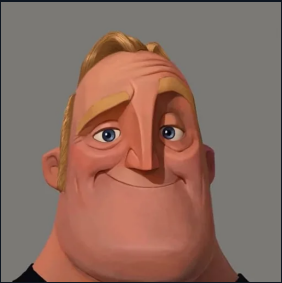

Я в конце этого файла:

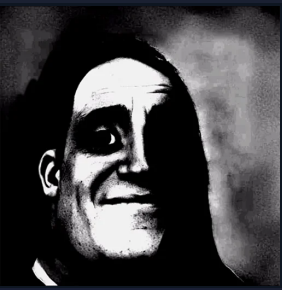